Customer Churn

It is when an existing customer, user, subscriber, or any kind of return client stops doing business or ends the relationship with a company.


Types of Customer Churn –


Contractual Churn : When a customer is under a contract for a service and decides to cancel the service e.g. Cable TV, SaaS.

Voluntary Churn : When a user voluntarily cancels a service e.g. Cellular connection.
Non-Contractual Churn : When a customer is not under a contract for a service and decides to cancel the service e.g. Consumer Loyalty in retail stores.
Involuntary Churn : When a churn occurs without any request of the customer e.g. Credit card expiration.

Reasons for Voluntary Churn

Lack of usage

Poor service

Better price

In [4]:
# Import required libraries 
import numpy as np 
import pandas as pd 

# Import the dataset 
dataset = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\pyhton read file\Telecom Churn.csv') 






In [3]:
# Glance at the first five records 
dataset.head() 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# Print all the features of the data 
dataset.columns 

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Exploratory Data Analysis on Telco Churn Dataset

Code : To find the number of churners and non-churners in the dataset:

In [8]:
# Churners vs Non-Churners 
dataset['churn'].value_counts() 


False    2850
True      483
Name: churn, dtype: int64


Code: To group data by Churn and compute the mean to find out if churners make more customer service calls than non-churners:

In [11]:
# Group data by 'Churn' and compute the mean 
print(dataset.groupby('churn')['customer service calls'].mean()) 


churn
False    1.449825
True     2.229814
Name: customer service calls, dtype: float64


Yes! Perhaps unsurprisingly, churners seem to make more customer service calls than non-churners.

Code: To find out if one State has more churners compared to another.

In [13]:
# Count the number of churners and non-churners by State 
print(dataset.groupby('state')['churn'].value_counts()) 


state  churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: churn, Length: 102, dtype: int64


While California is the most populous state in the U.S, there are not as many customers from California in our dataset. Arizona (AZ), for example, has 64 customers, 4 of whom ended up churning. In comparison, California has a higher number (and percentage) of customers who churned. This is useful information for a company.

# Exploring Data Visualizations : To understand how variables are distributed.

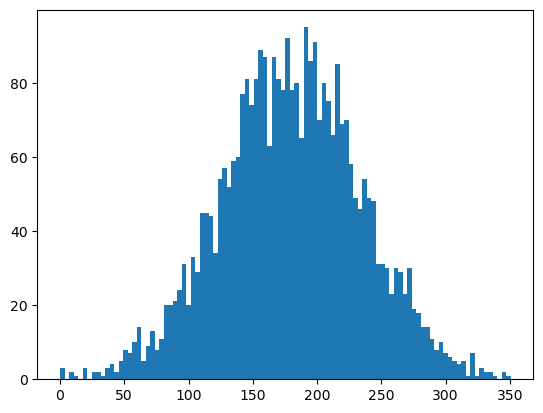

In [15]:
# Import matplotlib and seaborn 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Visualize the distribution of 'Total day minutes' 
plt.hist(dataset['total day minutes'], bins = 100) 

# Display the plot 
plt.show() 


Code: To visualize the difference in Customer service calls between churners and non-churners

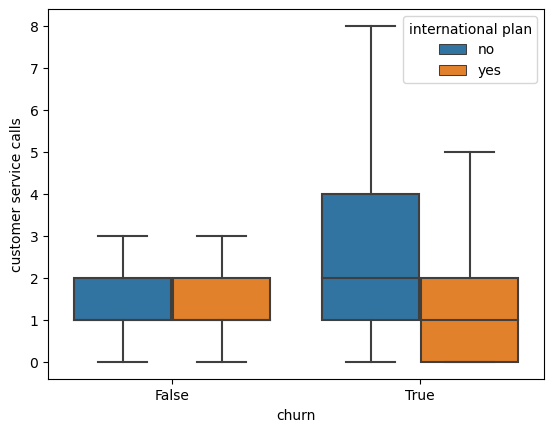

In [16]:
# Create the box plot 
sns.boxplot(x = 'churn', 
			y = 'customer service calls', 
			data = dataset, 
			sym = "",				 
			hue = "international plan") 
# Display the plot 
plt.show() 


It looks like customers who do churn end up leaving more customer service calls unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn. It’s now time to learn about how to preprocess your data prior to modelling.

Data Preprocessing for Telco Churn Dataset

Many Machine Learning models make certain assumptions about how the data is distributed. Some of the assumptions are as follows:

The features are normally distributed
The features are on the same scale
The datatypes of features are numeric
In telco churn data, Churn, Voice mail plan, and, International plan, in particular, are binary features that can easily be converted into 0’s and 1’s.

In [17]:
# Features and Labels 
X = dataset.iloc[:, 0:19].values 
y = dataset.iloc[:, 19].values # Churn 

# Encoding categorical data in X 
from sklearn.preprocessing import LabelEncoder 

labelencoder_X_1 = LabelEncoder() 
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3]) 

labelencoder_X_2 = LabelEncoder() 
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4]) 

# Encoding categorical data in y 
labelencoder_y = LabelEncoder() 
y = labelencoder_y.fit_transform(y) 


Code: Encoding State feature using One hot encoding

In [18]:
# Removing extra column to avoid dummy variable trap 
X_State = pd.get_dummies(X[:, 0], drop_first = True) 

# Converting X to a dataframe 
X = pd.DataFrame(X) 

# Dropping the 'State' column 
X = X.drop([0], axis = 1) 

# Merging two dataframes 
frames = [X_State, X] 
result = pd.concat(frames, axis = 1, ignore_index = True) 

# Final dataset with all numeric features 
X = result 


Code : To Create Training and Test sets

In [19]:
# Splitting the dataset into the Training and Test sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
													test_size = 0.2, 
													random_state = 0) 


Code: To scale features of the training and test sets

Code: To train a Random Forest classifier model on the training set.